## Assignment 4

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [28]:
df_players = pd.read_csv('ipl_data/Player.csv')

In [29]:
print (df_players.columns.values)
print (len(df_players))

['Player_Id' 'Player_Name' 'DOB' 'Batting_Hand' 'Bowling_Skill' 'Country'
 'Is_Umpire' 'Unnamed: 7']
523


In [30]:
print (df_players['Bowling_Skill'].unique())
print (df_players['Country'].unique())

['Right-arm medium' 'Right-arm offbreak' 'Right-arm fast-medium'
 'Legbreak googly' 'Right-arm medium-fast' 'Left-arm fast-medium'
 'Slow left-arm orthodox' nan 'Slow left-arm chinaman'
 'Left-arm medium-fast' 'Legbreak' 'Right-arm fast' 'Right-arm bowler'
 'Left-arm medium' 'Left-arm fast']
['India' 'New Zealand' 'Australia' 'Pakistan' 'South Africa' 'Sri Lanka'
 'West Indies' 'Zimbabwea' 'England' 'Bangladesh' 'Netherlands']


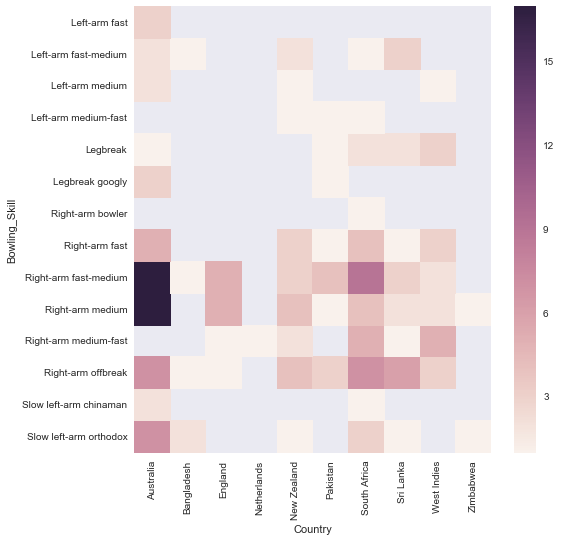

In [31]:
# df_1 = df_players.groupby(['Bowling_Skill', 'Country'])['Player_Id'].count()
country_map = {'India' : 1, 'New Zealand' : 2, 'Australia' : 3, 'Pakistan' : 4, 'South Africa' : 5, 'Sri Lanka' : 6, \
               'West Indies' : 7, 'Zimbabwea' : 8, 'England' : 9, 'Bangladesh' : 10, 'Netherlands' : 11}
bowl_style_map = {'Left-arm fast' : 1, 'Left-arm fast-medium' : 2, 'Left-arm medium' : 3, 'Legbreak' : 4, \
                 'Legbreak googly' : 5, 'Right-arm fast' : 6, 'Right-arm fast-medium' : 7, 'Right-arm medium' : 8, \
                 'Right-arm offbreak' : 9, 'Slow left-arm chinaman' : 10, 'Slow left-arm orthodox' : 11, \
                 'Right-arm medium-fast' : 12, 'Left-arm medium-fast' : 13, 'Right-arm bowler' : 14}
df_players['num_players'] = 1
df_1 = df_players[df_players['Country'] != 'India'].pivot_table(index = 'Bowling_Skill', columns = 'Country', 
                                                           values = 'Player_Name', aggfunc=lambda x: len(x.unique()))
# df_1 = df_players.groupby(['Country', 'Bowling_Skill'])['Player_Name'].count().reset_index()
# df_1['Country'] = df_1['Country'].apply(lambda x: country_map[x])
# df_1['Bowling_Skill'] = df_1['Bowling_Skill'].apply(lambda x: bowl_style_map[x])
# df_1.dropna(axis = 1)

plt.figure(figsize=(8,8))
sns_plot = sns.heatmap(df_1);
fig = sns_plot.get_figure()
fig.savefig('assign4_1.png', bbox_inches='tight') 
# sns.barplot(x="Num_Players", y="Bowling_Skill", data=df_1);

In [2]:
df_team = pd.read_csv('ipl_data/Team.csv')
df_match = pd.read_csv('ipl_data/Match.csv')

In [3]:
print (df_team.columns.values)
print (df_match.columns.values)

['Team_Id' 'Team_Name' 'Team_Short_Code']
['Match_Id' 'Match_Date' 'Team_Name_Id' 'Opponent_Team_Id' 'Season_Id'
 'Venue_Name' 'Toss_Winner_Id' 'Toss_Decision' 'IS_Superover' 'IS_Result'
 'Is_DuckWorthLewis' 'Win_Type' 'Won_By' 'Match_Winner_Id'
 'Man_Of_The_Match_Id' 'First_Umpire_Id' 'Second_Umpire_Id' 'City_Name'
 'Host_Country']


In [4]:
df_match = df_match[(df_match['Host_Country'] == 'India') & (df_match['IS_Result'] == 1)]
df_match['year'] = df_match['Match_Date'].apply(lambda x: 2000 + int(x[-2:]))

df_num_played = df_match.groupby(['Team_Name_Id', 'year'])['Match_Id'].count().reset_index()

df_num_played = df_num_played.merge(df_match.groupby(['Opponent_Team_Id', 'year'])['Match_Id'].count().reset_index(), 
                                    left_on = ['Team_Name_Id', 'year'], right_on = ['Opponent_Team_Id', 'year'],
                                    how = 'inner', suffixes = ('_1', '_2'))
df_num_played['tot_matches'] = df_num_played['Match_Id_1'] + df_num_played['Match_Id_2']
df_num_played = df_num_played[['Team_Name_Id', 'year', 'tot_matches']]

df_2 = df_match.groupby(['year', 'Match_Winner_Id'])['Match_Id'].count().reset_index()
df_2 = df_2.merge(df_num_played, left_on = ['Match_Winner_Id', 'year'], 
                  right_on = ['Team_Name_Id', 'year'], how = 'inner')

In [5]:
df_3 = df_2[['year', 'Match_Winner_Id', 'Match_Id', 'tot_matches']]
df_3['Match_Winner_Id'] = df_3['Match_Winner_Id'].apply(lambda x: int(x))
df_3.columns = ['year', 'Match_Winner_Id', 'wins', 'tot_matches']
df_3['pct_wins'] = 100 * df_3['wins'] / df_3['tot_matches']
df_3 = df_3.merge(df_team, how = 'inner', left_on = 'Match_Winner_Id', right_on = 'Team_Id')
# df_2['Pct_Wins'] = 100 * df_2['']

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


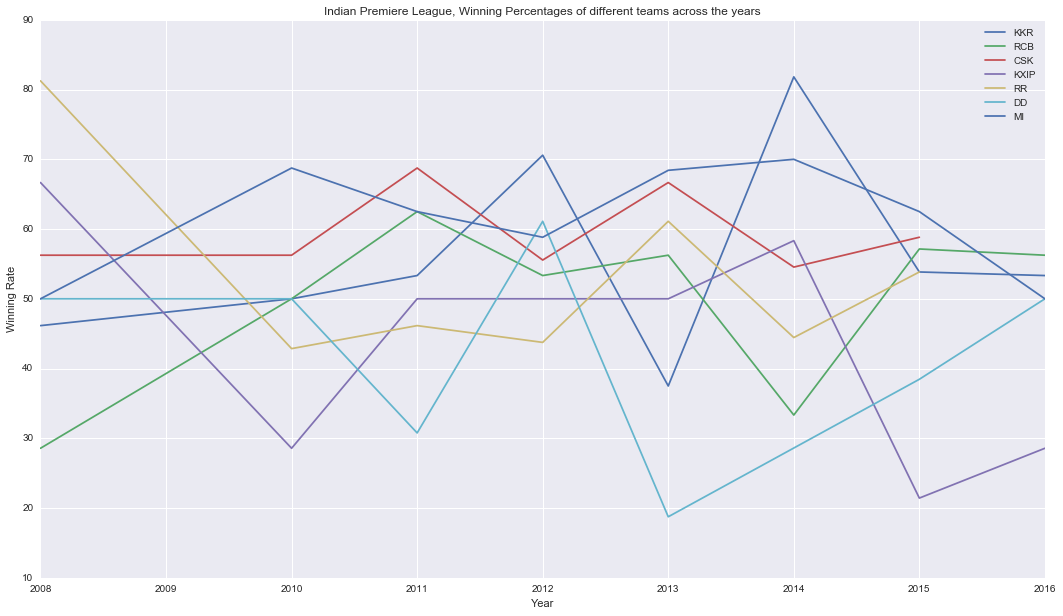

In [25]:
fig, ax = plt.subplots(figsize=(18,10))
# ax.figure(figsize=(14,8))

years = ('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016')

team_short_list = ['KKR','RCB','CSK','KXIP','RR','DD','MI']
for team in team_short_list:
    ax.plot(df_3[df_3['Team_Short_Code'] == team]['year'].values, df_3[df_3['Team_Short_Code'] == team]['pct_wins'].values,
             label = team)
ax.legend()
ax.set_xticklabels(('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'))
ax.set_xlabel('Year')
ax.set_ylabel('Winning Rate')
ax.set_title('Indian Premiere League, Winning Percentages of different teams across the years')
fig.savefig('assign4_2.png', dpi = 100)

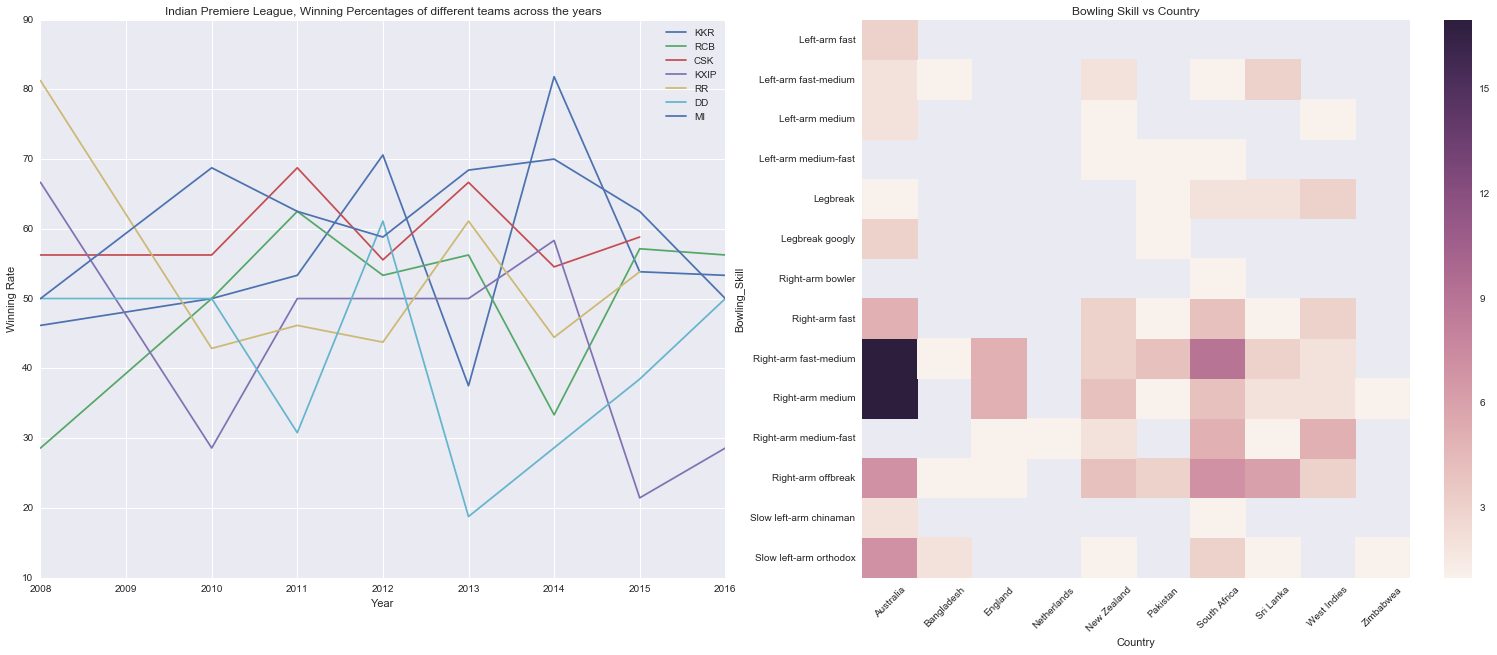

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(27,10))
# ax.figure(figsize=(14,8))

years = ('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016')

team_short_list = ['KKR','RCB','CSK','KXIP','RR','DD','MI']
for team in team_short_list:
    ax[0].plot(df_3[df_3['Team_Short_Code'] == team]['year'].values, df_3[df_3['Team_Short_Code'] == team]['pct_wins'].values,
             label = team)
ax[0].legend()
ax[0].set_xticklabels(('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'))
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Winning Rate')
ax[0].set_title('Indian Premiere League, Winning Percentages of different teams across the years')

sns.heatmap(df_1);
ax[1].set_title('Bowling Skill vs Country')
ax[1].set_xticklabels(('Australia', 'Bangladesh', 'England', 'Netherlands', 'New Zealand',\
                       'Pakistan', 'South Africa', 'Sri Lanka', 'West Indies', 'Zimbabwea'), rotation = 45)

fig.savefig('assign4_3.png', dpi = 100)